# HR Analytics Project- Understanding the Attrition in HR

## Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 


## Importing the required libraries:

In [553]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform,MinMaxScaler,PowerTransformer,OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [554]:
import pandas as pd
pd.set_option('display.max_columns',None)
df = pd.read_csv('HR_an.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## EDA (Exploratory Data Analysis)

In [555]:
df.shape

(1470, 35)

We have 1470 rows and 35 columns including target variable in this dataset

In [556]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

'Attrition' is target column, Rest are independent columns

In [557]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are some columns with object datatypes, which needs to encoded

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [559]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in this dataset

## Descriptive analysis or summary statistics

In [560]:
#statistical summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [561]:
#lets check for correlation among all the columns
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


We can see some nan values because of only one unique value

## Removing unnessary columns from dataset based on unique values


In [562]:
#employee count column is having only one unique value which is 1
pd.unique(df['EmployeeCount'])

array([1], dtype=int64)

In [563]:
#standard hours column is having only one unique value which is 80
pd.unique(df['StandardHours'])

array([80], dtype=int64)

In [564]:
#standard hours column is having only one unique value which is 0
pd.unique(df['Over18'])

array(['Y'], dtype=object)

In [565]:
#all the unique values in employee number columns
emp = pd.unique(df['EmployeeNumber'])
len(emp)
#1470 unique values, so we can remove this column

1470

In [566]:
#Lets remove these two columns since they of no use
df.drop(['StandardHours','EmployeeCount','EmployeeNumber','Over18'],axis = 1, inplace = True)

In [567]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

## Data visualization

## Univariate Analysis

### Lets check class imbalance problem

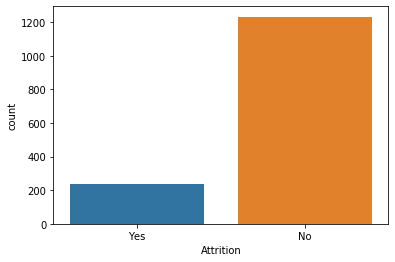

In [568]:
#lets check our traget variable for class imbalance problem
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Attrition",data=df)
plt.show()

We can see class is imbalanced

In [569]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

we have 1233 values for zero and 237 values for 1

## Bivariate Analysis with Target Variable

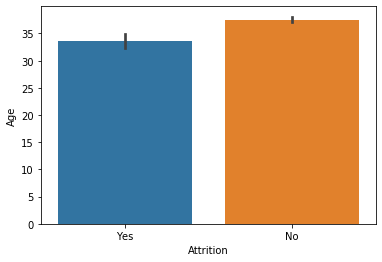

In [570]:
#Lets chcek age age vs attrition using barplot
sns.barplot(x="Attrition",y="Age",data=df)
plt.show()

We can see that age column doesn't attrition beacuse YES and NO are in eual ratio

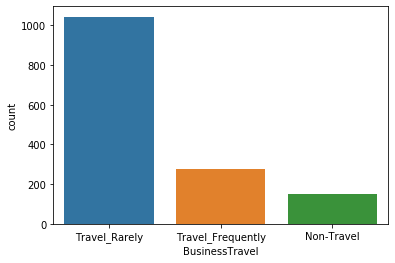

In [571]:
#Lets check the count of employees based on buisness travel
sns.countplot(x="BusinessTravel",data=df)
plt.show()


 from the above graph We can see that most of the employees Travel rarely

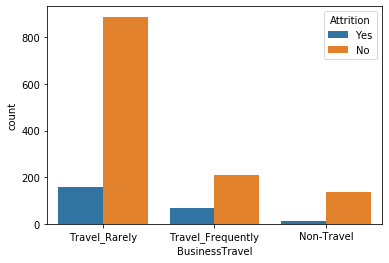

In [572]:
#Lets check businesstravel colum with the attritrion column with countplot
sns.countplot(x="BusinessTravel",data=df,hue="Attrition")
plt.show()


From the  on above graph  we can see that it attrition is higher when travel is Rare

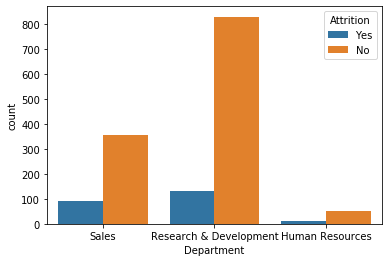

In [573]:
#lets check Department column with Attrition
sns.countplot(x="Department",data=df,hue="Attrition")
plt.show()


From the above table We can see that research & development department employees with hifh attrition

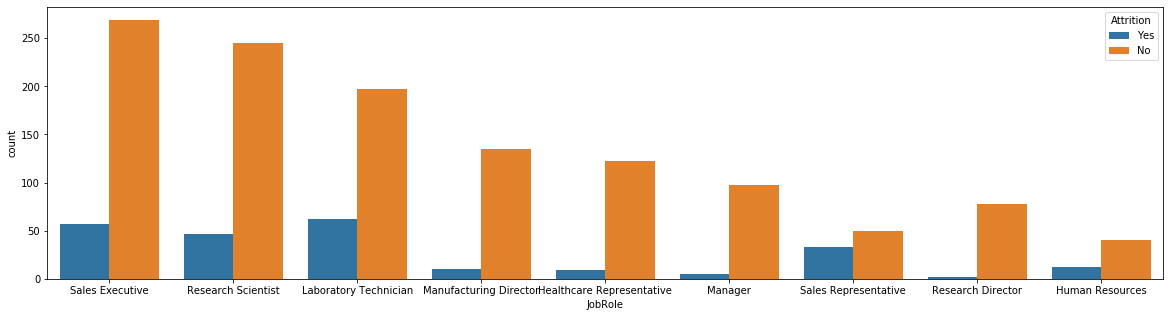

In [574]:
#Lets chcek jobrole column with attrition
plt.figure(figsize=(20,5))
sns.countplot(x="JobRole",data=df,hue="Attrition")
plt.show()


From the above table we can see that Atrrition very high for Sales Executive and very low for Research Director

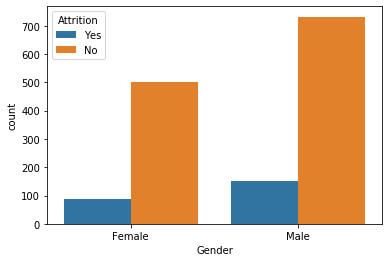

In [575]:
#Lets check gender column with the attrition column
sns.countplot(x="Gender",data=df,hue="Attrition")
plt.show()

From the above plot we can see that male have more attrition than female

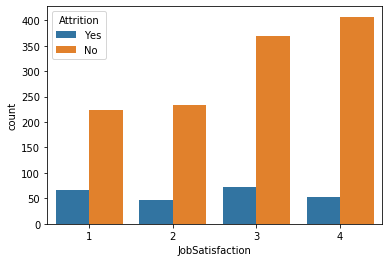

In [576]:
#lets chcek the Jobsatisfaction column with target variable
sns.countplot(x="JobSatisfaction",data=df,hue="Attrition")
plt.show()

From the above plot we can see that with increase in job satisfaction, chances of attrition decreases

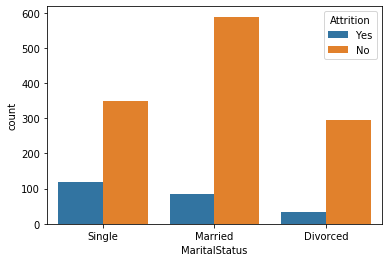

In [577]:
#Lets chcek the Marital staus with Traget column
sns.countplot(x="MaritalStatus",data=df,hue="Attrition")
plt.show()

From the above table we can see that attrition is low for married people, high for` singles

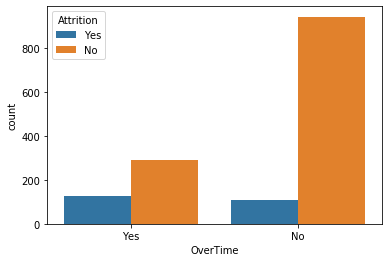

In [578]:
#Lets check overtime with target column
sns.countplot(x="OverTime",data=df,hue="Attrition")
plt.show()

From the above plot we can see people who do overtime has the chances of more attrition

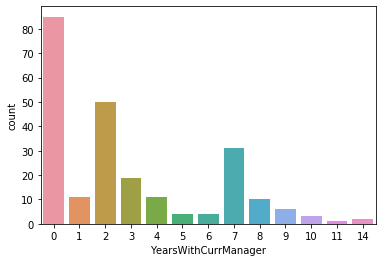

In [579]:
#Lets plot YearsWithCurrManager column when atrrition is True

sns.countplot(x="YearsWithCurrManager",data=df.loc[df["Attrition"]== "Yes"])
plt.show()


From the above plot we can see that Attrition is very high in the 0, 2 and 7th years with same manager

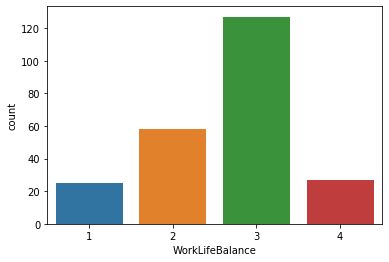

In [580]:
#lets check worklife balance with target variable
sns.countplot(x="WorkLifeBalance",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

From the above table we can see that when worklifr balance is 3, Attrition is high

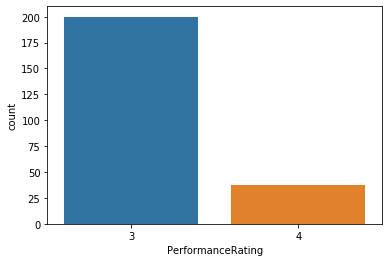

In [581]:

#lets check performnce rating column with target variable
sns.countplot(x="PerformanceRating",data=df.loc[df["Attrition"]== 'Yes'])
plt.show()


From the above plot we can see that whose rating 3 has high chances of atttrition

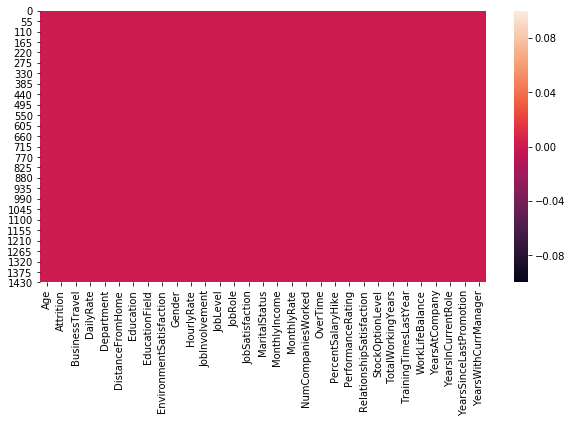

In [582]:
#checking the missing values with visualization technique
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

we can see there are no full null values in the data set

### Label Encoding

In [583]:
#Lets enocde  some columns since they are object datatype
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [584]:
#lets use Label encodingfro our atrget variable
collist = df.columns
encoding = LabelEncoder()

#lets exclude our last column Temp which is created check Train and test
for i in collist[:2]:
    if df[i].dtypes == 'object':
        df[i] = encoding.fit_transform(df[i].values.reshape(-1,1))

In [585]:
#lets use ordinal encoding for other variables
collist = df.columns
encoding = OrdinalEncoder()

#lets exclude our last column Temp which is created check Train and test
for i in collist[2:]:
    if df[i].dtypes == 'object':
        df[i] = encoding.fit_transform(df[i].values.reshape(-1,1))

In [586]:
df.dtypes

Age                           int64
Attrition                     int32
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

In [587]:
#now all the columns ae either int or float

## correlation

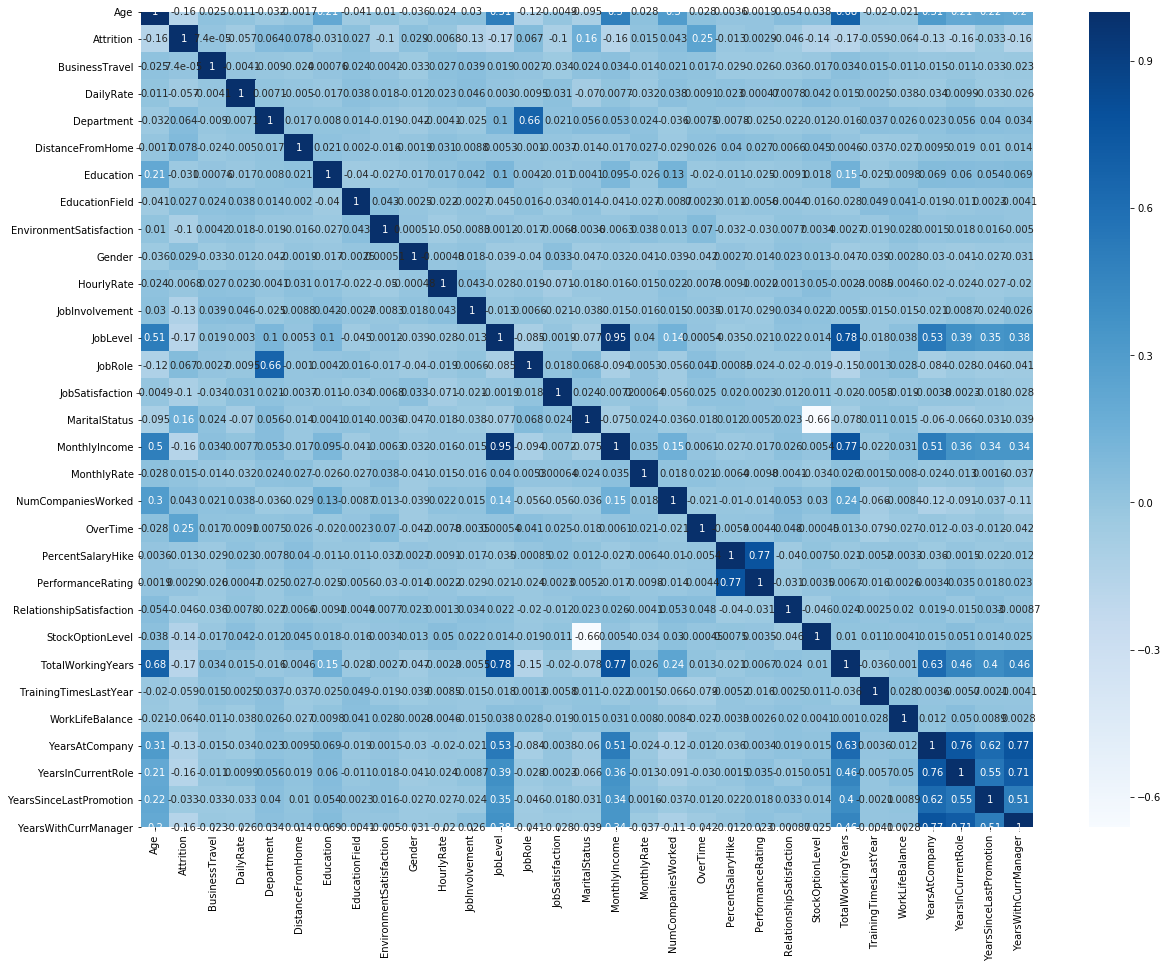

In [588]:
#correlation
fig = plt.figure(figsize=(20,15))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

In [589]:
#Montly income and job level column has 95 coreeletion with each other, we can remove one of those aince both provide same data
#all the other columns are having very less correlation with atrget variable

In [590]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['Attrition'].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M


#Therev columns are having almost zero correlation with the target column
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939


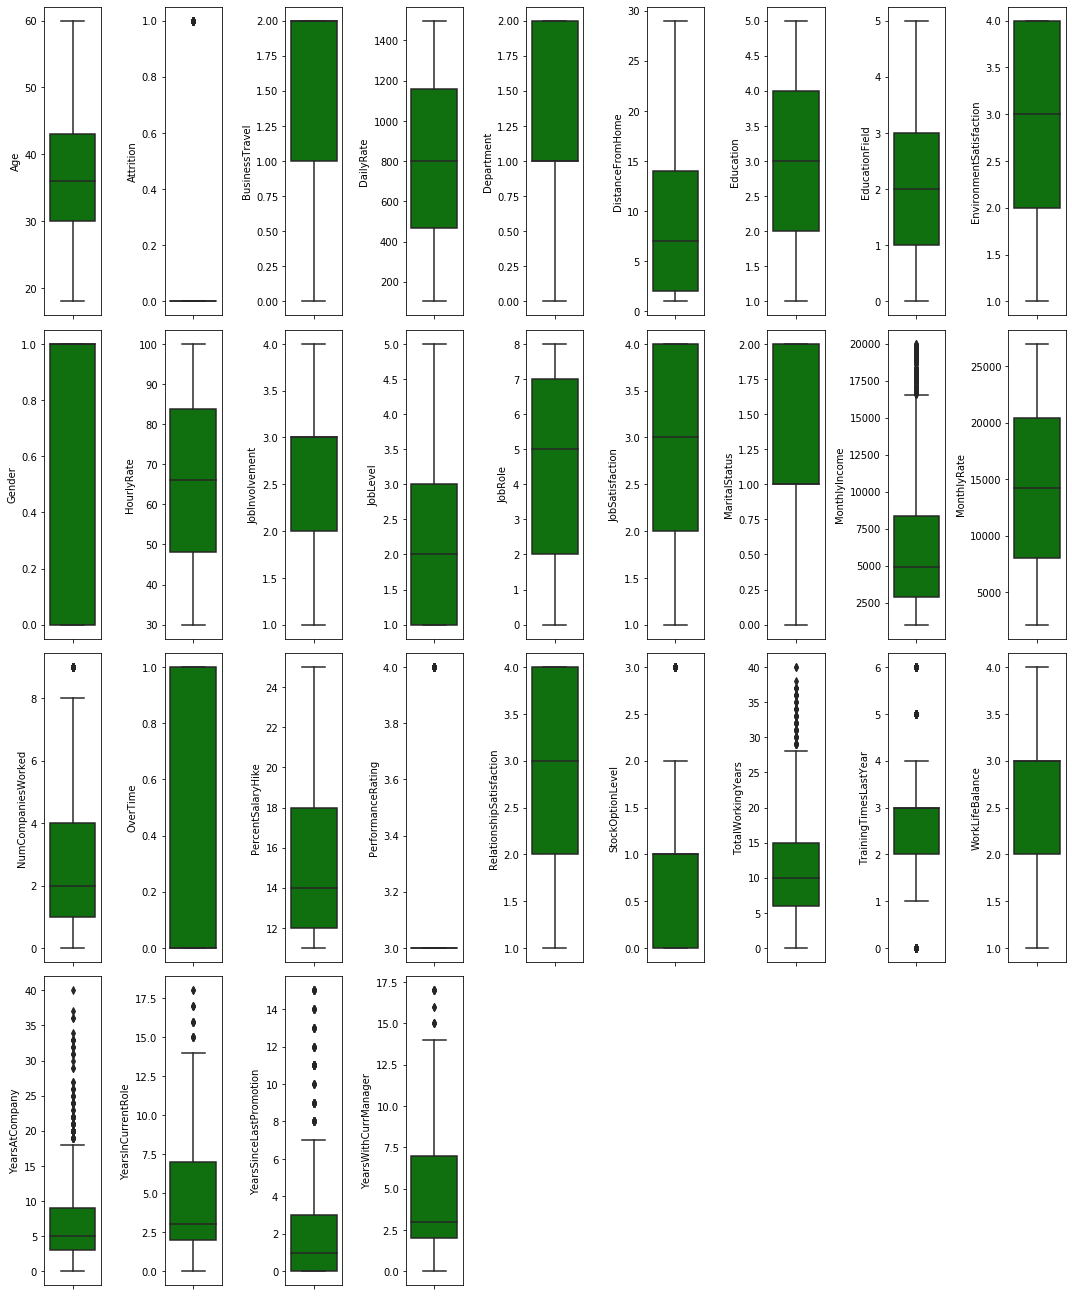

In [591]:
# lets check for outliers among all the columns
collist =df.columns
ncol = 9
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

In [592]:
df.MonthlyIncome.max()

19999

In [593]:
df.MonthlyIncome.min()

1009

In [594]:
df.NumCompaniesWorked.max()

9

In [595]:
df.NumCompaniesWorked.min()

0

In [596]:
#some of the columns are having ouliers
#but we can't consider the nominal and ordinal columns , 
#lets check outliers for numerical columns

In [597]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [598]:
Numerical_columns_with_outliers = ['MonthlyIncome','TotalWorkingYears','NumCompaniesWorked','TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

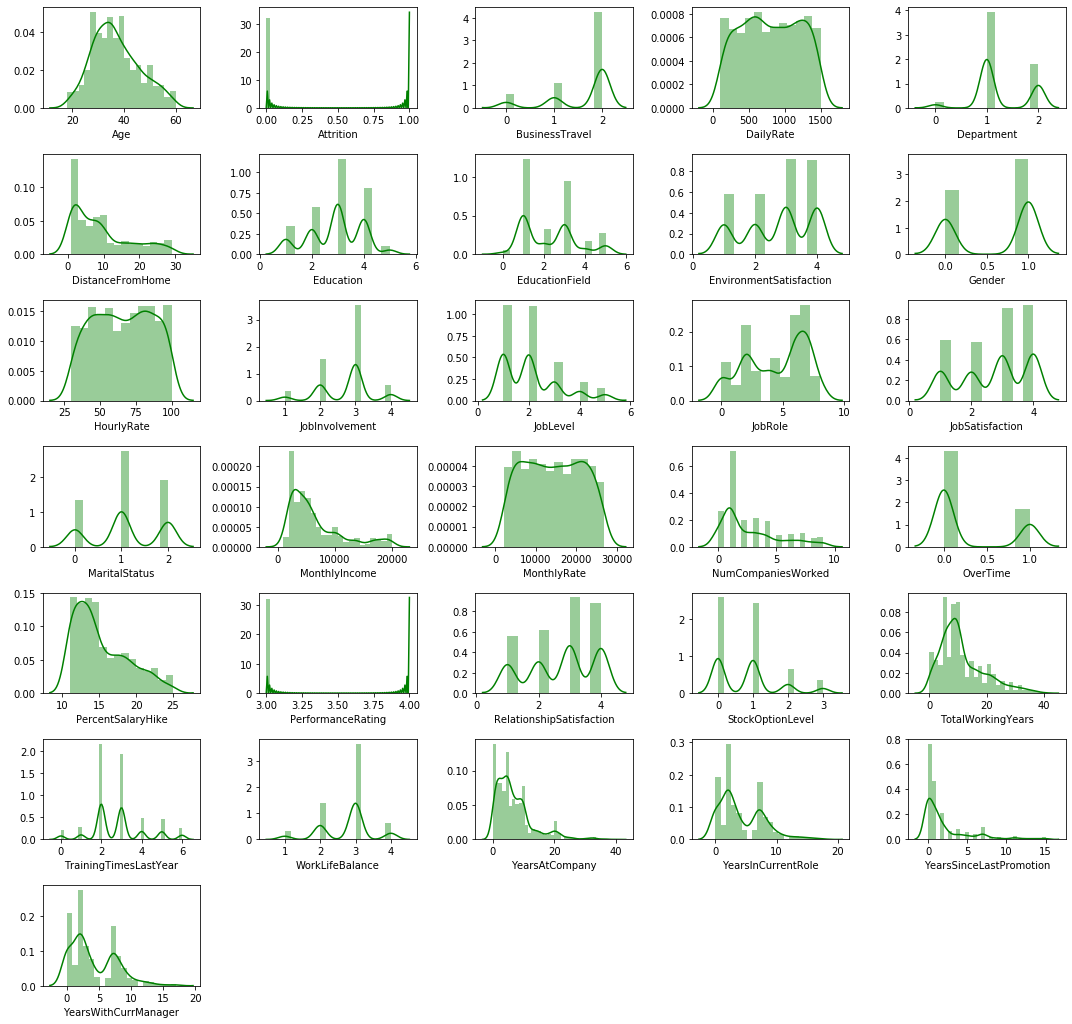

In [599]:
# Lets check the distribution
collist =df.columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

In [600]:
#almost all the numerical columns are normal distributed

## Data Preprocessing

## Outlier Removal

### IQR method

In [601]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [602]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [603]:
Numerical_columns_with_outliers = ['MonthlyIncome','TotalWorkingYears','NumCompaniesWorked','TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
for i in Numerical_columns_with_outliers:
    outliers_IQR3(df,i) #using this function since all the data was right skewed

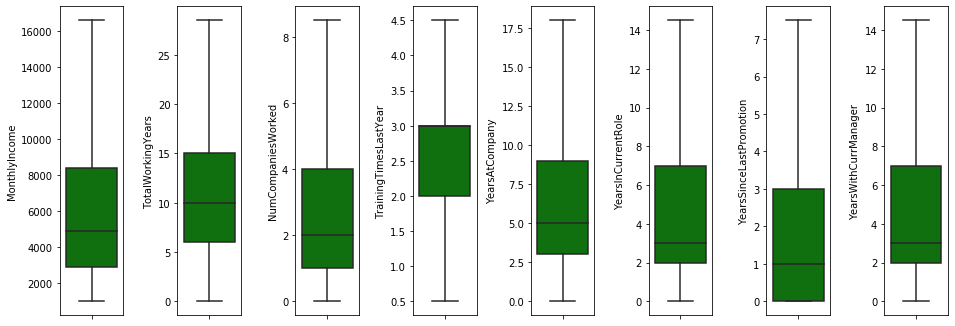

In [604]:
# lets check for outliers among all the columns
collist = Numerical_columns_with_outliers
ncol = 9
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

Outliers have been removed completly for numerical columns

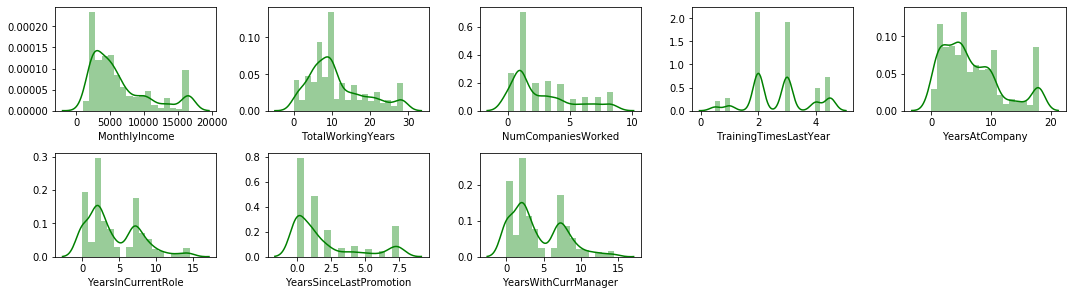

In [605]:
# Lets check the distribution
collist = Numerical_columns_with_outliers
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

In [606]:
#data is almost normal distribted

## Skewness Reduction

In [607]:
#lets check skewness for all the columns
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.168595
MonthlyRate                 0.018578
NumCompaniesWorked          0.971516
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.855518
TrainingTimesLastYear       0.117931
WorkLifeBalance            -0.552480
Y

In [608]:
#There are nominal and ordinal columns also in the above list
#so lets create new column for numerical columns

In [609]:
#numerical columns
numerical_columns_skewness = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [610]:
#skewness in numerical columns
for i in numerical_columns_skewness:
    if (df[i].skew() > 0.5) or (df[i].skew() < - 0.5):
        print(i,df[i].skew())

DistanceFromHome 0.9581179956568269
MonthlyIncome 1.1685950659135085
NumCompaniesWorked 0.9715160306247922
PercentSalaryHike 0.8211279755780908
TotalWorkingYears 0.8555180548071822
YearsAtCompany 0.9007741050839828
YearsInCurrentRole 0.8037040254736162
YearsSinceLastPromotion 1.2625629837973027
YearsWithCurrManager 0.7409997022492518


In [611]:
#Above Numerical columns are having skewness not in range -0.5 to +0.5
numerical_columns_with_skewness = ['DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears',
'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [612]:
collist = numerical_columns_with_skewness

In [613]:
collist

['DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [614]:
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
for i in range(len(collist)):
    if df[collist[i]].skew() > 0.5:
        arr = df[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        df[collist[i]] = arr 
    elif df[collist[i]].skew() < -0.5 :
        arr = df[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        df[collist[i]] = arr    
    else:
        pass
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.007468
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.000000
MonthlyRate                 0.018578
NumCompaniesWorked          0.012558
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears          -0.027114
TrainingTimesLastYear       0.117931
WorkLifeBalance            -0.552480
Y

In [615]:
#skewness in numerical columns
for i in numerical_columns_skewness:
    print(i,df[i].skew())

Age 0.4132863018563338
DailyRate -0.003518568352325854
DistanceFromHome -0.0074683057107952176
HourlyRate -0.03231095290044942
MonthlyIncome 0
MonthlyRate 0.018577807891132458
NumCompaniesWorked 0.01255817410620677
PercentSalaryHike 0.1162504536086004
TotalWorkingYears -0.02711402755713204
TrainingTimesLastYear 0.11793077645403381
YearsAtCompany -0.040849968963485056
YearsInCurrentRole -0.06752704754496722
YearsSinceLastPromotion 0.18706043756490495
YearsWithCurrManager -0.07292816511296937


In [616]:
#lets devide X and Y before handing appling SMOT Method
Y = df['Attrition']
X = df.drop('Attrition',axis = 1)

## Handling class Imbalance problem using SMOT method

To install imbalanced-learn library use "pip install imbalanced-learn" command

In [617]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, Y)

y_sm.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [618]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.23, random_state=48, stratify=y_sm)

In [619]:
# Number of classes in training Data
y_train.value_counts()

1    949
0    949
Name: Attrition, dtype: int64

In [620]:
#now our class imbalnace problem is sloved

## Lets Check for Best Random State 

In [621]:
maxaccu = 0
rand_state = 0
for i in range(42,100):

    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= i,stratify= y_sm )
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        rand_state = i
print('Best accuracy is {} on random state {}'.format(maxaccu,rand_state))

Best accuracy is 0.8139963167587477 on random state 48


In [622]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 48


In [623]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= rand_state )

## Model selection:

In [624]:
#lets Choose Among this Five Models
lg = LogisticRegression()
dtc = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier()

In [625]:
model_list = [dtc,lg,knn,svc,rf]
least_diffrence = []
for m in model_list:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x_sm,y_sm,cv =5)
    print("cross val score :",  cv.mean())
    diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
    least_diffrence.append((m,diffrence))
    print('diffrence b/w accurancy score and cross val score is :',diffrence)
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))



DecisionTreeClassifier()
[[221  63]
 [ 40 219]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       284
           1       0.78      0.85      0.81       259

    accuracy                           0.81       543
   macro avg       0.81      0.81      0.81       543
weighted avg       0.81      0.81      0.81       543

The accuracy of DecisionTreeClassifier() is 0.8103130755064457
cross val score : 0.8321923939197345
diffrence b/w accurancy score and cross val score is : 0.02187931841328883
f1 score for 0 is 0.8110091743119267 
f1 score for 1 is 0.8096118299445472 


LogisticRegression()
[[210  74]
 [ 62 197]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       284
           1       0.73      0.76      0.74       259

    accuracy                           0.75       543
   macro avg       0.75      0.75      0.75       543
weighted avg       0.75      0.75      0.75       543


In [626]:
least_diffrence

[(DecisionTreeClassifier(), 0.02187931841328883),
 (LogisticRegression(), 0.036397943650924636),
 (KNeighborsClassifier(), 0.010842631233069833),
 (SVC(), 0.013493590367439856),
 (RandomForestClassifier(), 0.015590679501010007)]

In [627]:
#Random forest is having least diffrence betwwen accurancy score and cross val score
#so lets choose random forest as out final model

## Hyperparameter Tuning:

In [628]:
# lets create the parameter list to pass in GridsearchCv

In [629]:
parameters = {'criterion' : ['gini','entropy'] ,'max_depth' : [3,4,5,6,7,8,10,25]
             ,'min_samples_split':[2,5,8,10,12,18],'max_features':['auto','sqrt'],'min_samples_leaf':[1,3,5,7,9]}

In [630]:
gsv = RandomizedSearchCV(estimator= rf , param_distributions=parameters,cv =5)
gsv.fit(x_train,y_train) 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18]})

In [631]:
gsv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25,
 'criterion': 'gini'}

we got the best parameters using Randomized search cv {'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

## Creating a Final Model as Random Forest Classifier

In [632]:
final_model = RandomForestClassifier(criterion='gini',max_depth=10,max_features='sqrt',min_samples_leaf=3,min_samples_split=5)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
accu =accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy of {} is {}'.format(m,accu))
cv = cross_val_score(m,x_sm,y_sm,cv =5)
print("cross val score :",  cv.mean())
diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
least_diffrence.append((m,diffrence))
print('diffrence b/w accurancy score and cross val score is :',diffrence)
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))

[[268  16]
 [ 25 234]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       284
           1       0.94      0.90      0.92       259

    accuracy                           0.92       543
   macro avg       0.93      0.92      0.92       543
weighted avg       0.92      0.92      0.92       543

The accuracy of RandomForestClassifier() is 0.9244935543278084
cross val score : 0.9088666431252104
diffrence b/w accurancy score and cross val score is : 0.01562691120259807
f1 score for 0 is 0.9289428076256498 
f1 score for 1 is 0.919449901768173 


In [633]:
#diffrence between cross val score and accuracy is only 0.26
#F1 is score 91% and 90% for both 0 and 1 after handling class imbalnce problem

## Saving the model:

In [634]:
import joblib
joblib.dump(final_mod,'HR_analytics.obj')

['HR_analytics.obj']

In [635]:
HR_analytics = joblib.load('HR_analytics.obj')

In [636]:
accuracy_score(HR_analytics.predict(x_test),y_test)

0.9244935543278084

## AUC ROC curve :

Since we have Random forest regressor as our final , lets check out the auc roc curve and score

In [637]:
final_model.score(x_train,y_train)

0.982839313572543

In [638]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]

In [639]:
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

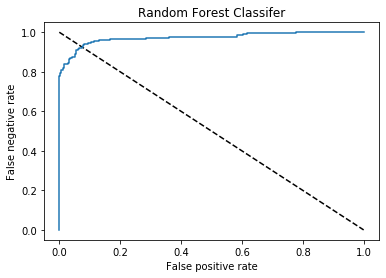

In [640]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Random Forest Classifer')
plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.title('Random Forest Classifer')
plt.show()

AUC - ROC curve is graphical representation of confusion matrix

In [641]:
#lets check our AUC ROC score for this Model
final_model.fit(x_train,y_train)
log_pred = final_model.predict(x_test)
accu =accuracy_score(y_test,log_pred)
print(accu*100)
print("AUC ROC Score: ",roc_auc_score(y_test,log_pred))

92.08103130755065
AUC ROC Score:  0.9197074337919408


## Conclusion

In [642]:
conclusion = pd.DataFrame((HR_analytics.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542
Predicted,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,0,1,1,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1
Actual,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,1,1,1,1,

90.1 % of the answer are correct, Model is also not overfitted as we checked with cross val scoce